In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor

# Task 1

In [2]:
# set time
TIME_MAX = 2
TIMESTEP = 0.1
STEPS =  floor(TIME_MAX / TIMESTEP)

time = [k * TIMESTEP for k in range(STEPS)]

In [3]:
# differential function
def x_dot(x,t):
    return (-2 * t * x**2) / (t**2 + 1)

# true result function
def x_true_solver(time):
    return 1 / ( np.log(time**2 + 1) + 0.5 )

x_true = x_true_solver(time)

In [4]:
# Euler Verfahren
def euler_solver(function, time, x0):
    x = np.zeros(len(time))   # reserve array space
    x[0] = x0

    for k in range(len(time)-1):
        x[k+1] = x[k] + (time[1]-time[0]) * function(x[k], time[k])

    return x

x_euler = euler_solver(x_dot, time, x0=2)

In [5]:
# Heun Verfahren
def heun_solver(time, x0):
    x = np.zeros(len(time))   # reserve array space
    x[0] = x0

    for k in range(len(time)-1):
        k_1 = x_dot(x[k], time[k])
        x_2 = x[k] + TIMESTEP * k_1 
        k_2 = x_dot(x_2, time[k+1])
        x_k2 = x[k] + 0.5 * TIMESTEP * (k_1 + k_2)

        x[k+1] = x[k] + (time[k+1] - time[k]) / 2 * ( x_dot(x[k], time[k]) + x_dot(x_k2, time[k+1]) )

    return x

x_heun = heun_solver(time, 2)

In [6]:
# runge kutta verfahren
def runge_kutta_solver(time, x0):
    x = np.zeros(len(time))   # reserve array space
    x[0] = x0

    for k in range(len(time)-1):
        k_1 = x_dot(x[k], time[k])
        k_2 = x_dot(x[k] + TIMESTEP/2*k_1, time[k] + TIMESTEP/2)
        k_3 = x_dot(x[k] + TIMESTEP/2*k_2, time[k] + TIMESTEP/2)
        k_4 = x_dot(x[k] + TIMESTEP*k_3, time[k] + TIMESTEP)

        x[k+1] = x[k] + TIMESTEP * ( k_1 + 2*k_2  + 2*k_3 + k_4 ) / 6

    return x

x_runge_kutta = runge_kutta_solver(time, 2)

Text(0.5, 1.0, 'Lösungen der Differentialgleichung')

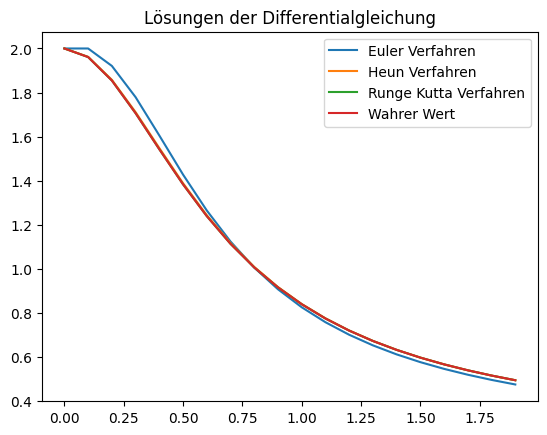

In [7]:
plt.plot(time, x_euler, label="Euler Verfahren")
plt.plot(time, x_heun, label="Heun Verfahren")
plt.plot(time, x_runge_kutta, label="Runge Kutta Verfahren")
plt.plot(time, x_true, label="Wahrer Wert")

plt.legend()
plt.title("Lösungen der Differentialgleichung")


# Task 2

In [8]:
# new differential function
def y_dot(x, t):
    return x + t**3

# set time range
TIME_MIN = -1.5
TIME_MAX = 2

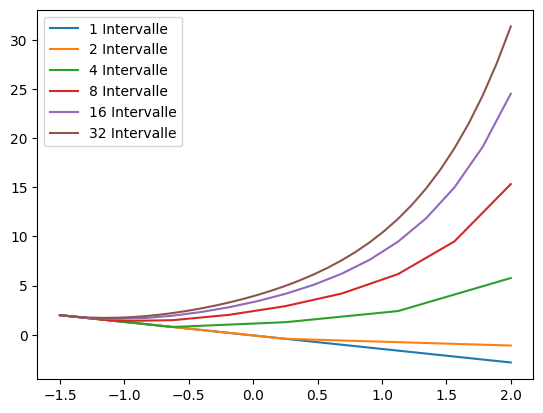

In [18]:
def solve_for_step(steps):
    time = [TIME_MIN + k * (TIME_MAX - TIME_MIN) / steps for k in range(steps+1)]
    y = euler_solver(y_dot, time, 2)
    return time, y

for i in range(6):
    steps = 2**i
    time, y = solve_for_step(steps)
    plt.plot(time, y, label=f"{steps} Intervalle")

plt.legend()
plt.show()

# !!! Lösung zip file scott